In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing
import string
from datetime import date, timedelta


C:\Users\egork\AppData\Local\Temp/ipykernel_13868/199340750.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


# Get a dataframe pd.util.testing.makeDataFrame() - df


In [2]:
df = pd.util.testing.makeDataFrame() 
df['Index'] = df.index
df.sort_values(by='Index', inplace=True)
df.head(10)

,A,B,C,D,Index
20xkHz2Lhk,0.367665,0.036588,-1.741454,-0.926953,20xkHz2Lhk
2tnOjhWQBJ,1.858566,0.296934,0.271732,0.683328,2tnOjhWQBJ
2xOe0Tr9M4,2.247193,-0.347709,-1.363204,1.991696,2xOe0Tr9M4
8gW3d8iEuq,0.071620,-0.644080,0.852307,0.992145,8gW3d8iEuq
Bf7NhVV7qz,-0.164438,-0.703637,0.343075,-0.588066,Bf7NhVV7qz
H0GTlNoePi,-1.246008,0.387570,-1.230050,0.419091,H0GTlNoePi
JDtFkKKJ2M,1.139308,-0.476512,-0.781597,-0.838309,JDtFkKKJ2M
L1GyJ5eQYl,-1.712860,-0.880091,-0.428827,0.752787,L1GyJ5eQYl
RLOMX7ePom,0.505153,0.235717,-0.785810,-0.309572,RLOMX7ePom
RO8WXOlh7y,-0.927879,-0.130743,-0.436967,-0.256922,RO8WXOlh7y


# Month equals the number of the row (sorted by the index ascending) in cycling mode 1 to 12.

In [3]:
import itertools
I=itertools.cycle(range(1,13))
df['Month'] = [next(I) for _ in range(len(df))]
df

,A,B,C,D,Index,Month
20xkHz2Lhk,0.367665,0.036588,-1.741454,-0.926953,20xkHz2Lhk,1
2tnOjhWQBJ,1.858566,0.296934,0.271732,0.683328,2tnOjhWQBJ,2
2xOe0Tr9M4,2.247193,-0.347709,-1.363204,1.991696,2xOe0Tr9M4,3
8gW3d8iEuq,0.071620,-0.644080,0.852307,0.992145,8gW3d8iEuq,4
Bf7NhVV7qz,-0.164438,-0.703637,0.343075,-0.588066,Bf7NhVV7qz,5


# Day equals the last letter index (no matter which register the letter is). A/a == 1, B/b == 2 etc. 

In [4]:
dictt = {}
for i in enumerate(string.ascii_lowercase):
    dictt[i[1]] = i[0]+1
days=[]
alpha_list = list(string.ascii_lowercase)
indexx = -1

for i in df["Index"]:
    indexx=-1
    while  i[indexx].lower() not in alpha_list:
            indexx+=-1
    days.append(dictt[i[indexx].lower()])
    
df['Day'] = days
df.head(5)

,A,B,C,D,Index,Month,Day
20xkHz2Lhk,0.367665,0.036588,-1.741454,-0.926953,20xkHz2Lhk,1,11
2tnOjhWQBJ,1.858566,0.296934,0.271732,0.683328,2tnOjhWQBJ,2,10
2xOe0Tr9M4,2.247193,-0.347709,-1.363204,1.991696,2xOe0Tr9M4,3,13
8gW3d8iEuq,0.071620,-0.644080,0.852307,0.992145,8gW3d8iEuq,4,17
Bf7NhVV7qz,-0.164438,-0.703637,0.343075,-0.588066,Bf7NhVV7qz,5,26


# If the number of vowels is greater than the number of consonants then the year should be 2021, otherwise - 2022.


In [5]:
vowels = ('a', 'e', 'i', 'o', 'u')
vowel=0
const=0
years=[]
alpha_list = list(string.ascii_lowercase)
for i in df['Index']:
    for a in list(i.lower()):
        if a in vowels:
            vowel+=1
        elif a in alpha_list:
            const +=1
    if  vowel> const:
        years.append(2021)
    else:
        years.append(2022)
df['Year'] = years
df.head()

,A,B,C,D,Index,Month,Day,Year
20xkHz2Lhk,0.367665,0.036588,-1.741454,-0.926953,20xkHz2Lhk,1,11,2022
2tnOjhWQBJ,1.858566,0.296934,0.271732,0.683328,2tnOjhWQBJ,2,10,2022
2xOe0Tr9M4,2.247193,-0.347709,-1.363204,1.991696,2xOe0Tr9M4,3,13,2022
8gW3d8iEuq,0.071620,-0.644080,0.852307,0.992145,8gW3d8iEuq,4,17,2022
Bf7NhVV7qz,-0.164438,-0.703637,0.343075,-0.588066,Bf7NhVV7qz,5,26,2022


# creating a date column

In [6]:
df['date'] = pd.to_datetime(df[['Year','Month','Day']])
df

,A,B,C,D,Index,Month,Day,Year,date
20xkHz2Lhk,0.367665,0.036588,-1.741454,-0.926953,20xkHz2Lhk,1,11,2022,2022-01-11
2tnOjhWQBJ,1.858566,0.296934,0.271732,0.683328,2tnOjhWQBJ,2,10,2022,2022-02-10
2xOe0Tr9M4,2.247193,-0.347709,-1.363204,1.991696,2xOe0Tr9M4,3,13,2022,2022-03-13
8gW3d8iEuq,0.071620,-0.644080,0.852307,0.992145,8gW3d8iEuq,4,17,2022,2022-04-17
Bf7NhVV7qz,-0.164438,-0.703637,0.343075,-0.588066,Bf7NhVV7qz,5,26,2022,2022-05-26
H0GTlNoePi,-1.246008,0.387570,-1.230050,0.419091,H0GTlNoePi,6,9,2022,2022-06-09
JDtFkKKJ2M,1.139308,-0.476512,-0.781597,-0.838309,JDtFkKKJ2M,7,13,2022,2022-07-13
L1GyJ5eQYl,-1.712860,-0.880091,-0.428827,0.752787,L1GyJ5eQYl,8,12,2022,2022-08-12
RLOMX7ePom,0.505153,0.235717,-0.785810,-0.309572,RLOMX7ePom,9,13,2022,2022-09-13
RO8WXOlh7y,-0.927879,-0.130743,-0.436967,-0.256922,RO8WXOlh7y,10,25,2022,2022-10-25


# Make a pivot table showing dynamics of every column by months (agg is sum). + Charts for every column - save into df_months1


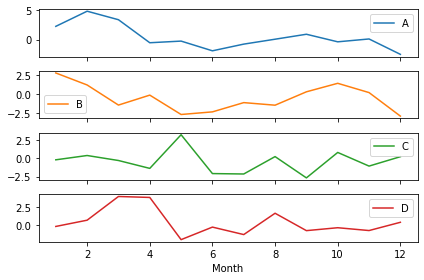

,A,B,C,D
Month,,,,
1,2.268499,2.772711,-0.201306,-0.211979
2,4.863690,1.206485,0.386234,0.672614
3,3.405208,-1.414908,-0.296436,4.022404
4,-0.538715,-0.116447,-1.373878,3.888201
5,-0.257916,-2.643025,3.226383,-2.077399


In [7]:
df_months1 = df.groupby(['Month']).agg('sum').drop(columns=['Day','Year'])
df_months1.plot(subplots=True)
plt.tight_layout()
plt.show()
df_months1.head(5)


# Make a full date list between min dataframe date and max dataframe date to include dates without values and make a pivot table with dates as columns and current columns as index (agg is sum). Save into df_days. 

In [8]:
days_list = pandas.date_range(df['date'].min(),df['date'].max()-timedelta(days=1),freq='d')
pd.Series(days_list)
df1 = pd.DataFrame({'date':days_list})
df_days = df1.merge(df, on='date',how='left')
df_days['current_date'] = pd.to_datetime(df_days[['Year','Month','Day']])
df_days[['A','B','C','D']] = df_days[['A','B','C','D']].fillna(0)
df_days['Total'] = df_days['A'] + df_days['B'] + df_days['C'] + df_days['D']
df_days = df_days.drop(columns=['Index','Month','Day','Year','A','B','C','D'])
df_days = pd.pivot_table(df_days, index='current_date', fill_value=0, columns='date',dropna=False, aggfunc='sum')
df_days

Total                                              \
date         2022-01-11 2022-01-12 2022-01-13 2022-01-14 2022-01-15   
current_date                                                          
2022-01-11    -2.264153          0          0          0          0   
2022-01-16     0.000000          0          0          0          0   
2022-01-22     0.000000          0          0          0          0   
2022-02-10     0.000000          0          0          0          0   
2022-02-13     0.000000          0          0          0          0   
2022-02-25     0.000000          0          0          0          0   
2022-03-13     0.000000          0          0          0          0   
2022-03-23     0.000000          0          0          0          0   
2022-03-26     0.000000          0          0          0          0   
2022-04-08     0.000000          0          0          0          0   
2022-04-17     0.000000          0          0          0          0   
2022-04-26     0.000000          0          0          0          0   
2022-05-06     0.000000          0          0          0          0   
2022-05-24     0.000000          0          0          0          0   
2022-05-26     0.000000          0          0          0          0   
2022-06-09     0.000000          0          0          0          0   
2022-06-10     0.000000          0          0          0          0   
2022-06-13     0.000000          0          0          0          0   
2022-07-11     0.000000          0          0          0          0   
2022-07-13     0.000000          0          0          0          0   
2022-08-12     0.000000          0          0          0          0   
2022-08-22     0.000000          0          0          0          0   
2022-09-07     0.000000          0          0          0          0   
2022-09-13     0.000000          0          0          0          0   
2022-10-20     0.000000          0          0          0          0   
2022-10-25     0.000000          0          0          0          0   
2022-11-08     0.000000          0          0          0          0   
2022-11-20     0.000000          0          0          0          0   
2022-12-06     0.000000          0          0          0          0   

                                                                     ...  \
date         2022-01-16 2022-01-17 2022-01-18 2022-01-19 2022-01-20  ...   
current_date                                                         ...   
2022-01-11     0.000000          0          0          0          0  ...   
2022-01-16     3.117242          0          0          0          0  ...   
2022-01-22     0.000000          0          0          0          0  ...   
2022-02-10     0.000000          0          0          0          0  ...   
2022-02-13     0.000000          0          0          0          0  ...   
2022-02-25     0.000000          0          0          0          0  ...   
2022-03-13     0.000000          0          0          0          0  ...   
2022-03-23     0.000000          0          0          0          0  ...   
2022-03-26     0.000000          0          0          0          0  ...   
2022-04-08     0.000000          0          0          0          0  ...   
2022-04-17     0.000000          0          0          0          0  ...   
2022-04-26     0.000000          0          0          0          0  ...   
2022-05-06     0.000000          0          0          0          0  ...   
2022-05-24     0.000000          0          0          0          0  ...   
2022-05-26     0.000000          0          0          0          0  ...   
2022-06-09     0.000000          0          0          0          0  ...   
2022-06-10     0.000000          0          0          0          0  ...   
2022-06-13     0.000000          0          0          0          0  ...   
2022-07-11     0.000000          0          0          0          0  ...   
2022-07-13     0.000000          0          0          0          0  ... 

# Drop all columns with even-numbered days. - save into df_days1

In [9]:
df_days1 = df_days
df_days1 = df_days1.droplevel(0, axis=1)
df_days1.head(5)

even=[]
not_even=[]
for col in df_days1.columns:
    if col.day%2 == 0:
        even.append(col)
    else:
        not_even.append(col)

#Можно сделать с .drop(inplace=true) 
df_days1 = df_days1[even]

df_days1.head(5)

date,2022-01-12,2022-01-14,2022-01-16,2022-01-18,2022-01-20,2022-01-22,2022-01-24,2022-01-26,2022-01-28,2022-01-30,...,2022-11-18,2022-11-20,2022-11-22,2022-11-24,2022-11-26,2022-11-28,2022-11-30,2022-12-02,2022-12-04,2022-12-06
current_date,,,,,,,,,,,,,,,,,,,,,
2022-01-11,0,0,0.000000,0,0,0.000000,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0.0
2022-01-16,0,0,3.117242,0,0,0.000000,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0.0
2022-01-22,0,0,0.000000,0,0,3.774837,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0.0
2022-02-10,0,0,0.000000,0,0,0.000000,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0.0
2022-02-13,0,0,0.000000,0,0,0.000000,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0.0


# df_days - delete row with minimal sum of all elements and take only every third column as a result. Save into df_days2.


In [10]:
df_days2 = df_days[(df_days.sum(axis='columns') > df_days.sum(axis='columns').min())]
df_days2 = df_days2[::3]
df_days2

Total                                              \
date         2022-01-11 2022-01-12 2022-01-13 2022-01-14 2022-01-15   
current_date                                                          
2022-01-11    -2.264153          0          0          0          0   
2022-02-10     0.000000          0          0          0          0   
2022-03-13     0.000000          0          0          0          0   
2022-04-08     0.000000          0          0          0          0   
2022-05-06     0.000000          0          0          0          0   
2022-06-09     0.000000          0          0          0          0   
2022-07-13     0.000000          0          0          0          0   
2022-09-07     0.000000          0          0          0          0   
2022-10-25     0.000000          0          0          0          0   
2022-12-06     0.000000          0          0          0          0   

                                                                     ...  \
date         2022-01-16 2022-01-17 2022-01-18 2022-01-19 2022-01-20  ...   
current_date                                                         ...   
2022-01-11          0.0          0          0          0          0  ...   
2022-02-10          0.0          0          0          0          0  ...   
2022-03-13          0.0          0          0          0          0  ...   
2022-04-08          0.0          0          0          0          0  ...   
2022-05-06          0.0          0          0          0          0  ...   
2022-06-09          0.0          0          0          0          0  ...   
2022-07-13          0.0          0          0          0          0  ...   
2022-09-07          0.0          0          0          0          0  ...   
2022-10-25          0.0          0          0          0          0  ...   
2022-12-06          0.0          0          0          0          0  ...   

                                                                     \
date         2022-11-28 2022-11-29 2022-11-30 2022-12-01 2022-12-02   
current_date                                                          
2022-01-11            0          0          0          0          0   
2022-02-10            0          0          0          0          0   
2022-03-13            0          0          0          0          0   
2022-04-08            0          0          0          0          0   
2022-05-06            0          0          0          0          0   
2022-06-09            0          0          0          0          0   
2022-07-13            0          0          0          0          0   
2022-09-07            0          0          0          0          0   
2022-10-25            0          0          0          0          0   
2022-12-06            0          0          0          0          0   

                                                                     
date         2022-12-03 2022-12-04 2022-12-05 2022-12-06 2022-12-07  
current_date                                                         
2022-01-11            0          0          0   0.000000          0  
2022-02-10            0          0          0   0.000000          0  
2022-03-13            0          0          0   0.000000          0  
2022-04-08            0          0          0   0.000000          0  
2022-05-06            0          0          0   0.000000          0  
2022-06-09            0          0          0   0.000000          0  
2022-07-13            0          0          0   0.000000          0  
2022-09-07            0          0          0   0.000000          0  
2022-10-25            0          0          0   0.000000          0  
2022-12-06            0          0          0  -3.483271          0  

[10 rows x 331 columns]

## Write an ETL class structure. Imagine the situation that you have an abstract API (let’s say https://blahblahblah.com/api/v1/?reportId=123) to download the data from and a DWH to upload data to. Please prepare a structure of python classes how you’d do the ETL. Logic of every method may be described with comment (without a code). But you should mention libs that’d be used.


In [ ]:
#У меня есть опыт практики с базой данных IBM поэтому буду делать через него
!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
!pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
!pip install ipython-sql

import ibm_db
import sqlite3
import pandas as pd

#Меняем параметры на свои
dsn_hostname = "YourDb2Hostname" # например "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "YourDb2Username"        # например "abc12345"
dsn_pwd = "YoueDb2Password"      # например "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # например "BLUDB"
dsn_port = "YourPort"                # например "32733" 
dsn_protocol = "TCPIP"            # например "TCPIP"
dsn_security = "SSL"              #например "SSL"

#Переменная с параметрами
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

#Коннет
def connect():
    try:
        conn = ibm_db.connect(dsn, "", "") 
        print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

    except:
        print ("Unable to connect: ", ibm_db.conn_errormsg() )

#Получение данных
#Можно написать много разных функций для SQL
def extract():
    cursor_obj = conn.cursor()
    statement = '''SELECT * FROM table_name'''
    cursor_obj.execute(statement)
    output_all = cursor_obj.fetchall()
    for tbl in output_all:
        #query and load save data to dataframe
        df = pd.read_sql_query(f'select * FROM {tbl[0]}', conn)
        load(df, tbl[0])
        
#Будет назначать тип данных. Похожее можно сделать с остальными        
def asint(val):
    return int(val, base=0)

#Загрузка данных. 
#Так же можно добавить строки которые будут писать сколько строк загружено итд
def load(df, tbl):
    df.to_sql("tablename", con, if_exists='replace', index=False,method="multi")    

def close():
    conn.close()
    